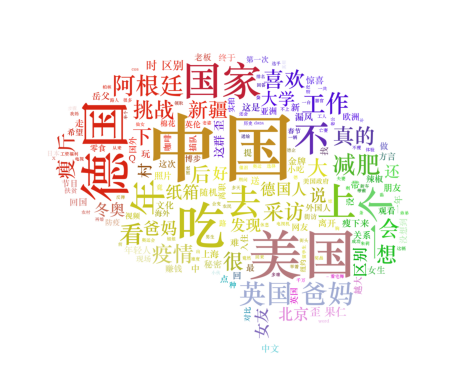

In [8]:
import matplotlib.pyplot as plt #数据可视化
import jieba #词语切割
import wordcloud #分词
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS #词云，颜色生成器，停止词
import numpy as np #科学计算
from PIL import Image #处理图片

def get_stopword_list(file):
    with open(file, 'r', encoding='utf-8') as f:    # 
        stopword_list = [word.strip('\n') for word in f.readlines()]
    return stopword_list

def clean_stopwords(f,stopwords=[]): #去除停用词
    result = []
    word_list = jieba.lcut(f)
    for w in word_list:
        if w not in stopwords:
            result.append(w)
    return result

def ciyun():
    with open('./word_data/myword_data.txt','r',encoding='utf-8') as f:  #打开新的文本转码为gbk
        textfile= f.read()  #读取文本内容
    stopwords = get_stopword_list('./word_data/baidu_stopwords.txt') #获取停用词
    stopwords+=['人','都'] #添加停用词
    # wordlist = jieba.lcut(textfile)#切割词语
    wordlist = clean_stopwords('./word_data/'+textfile,stopwords=stopwords)#去除停用词
    space_list = ' '.join(wordlist) #空格链接词语
    #print(space_list)
    backgroud = np.array(Image.open('./word_data/background.jpg')) #设置背景图片
	


    wc = WordCloud(width=1400, height=2200,
			background_color='white',
	        mode='RGB', 
			mask=backgroud, #添加蒙版，生成指定形状的词云，并且词云图的颜色可从蒙版里提取
			max_words=200,
			# stopwords=STOPWORDS.add('我'),#内置的屏蔽词,并添加自己设置的词语
            
            
			font_path='C:\Windows\Fonts\STZHONGS.ttf',
			max_font_size=150,
			relative_scaling=0.6, #设置字体大小与词频的关联程度为0.4
			random_state=50, 
			scale=2, 
			).generate(space_list) 
			
    image_color = ImageColorGenerator(backgroud)#设置生成词云的颜色，如去掉这两行则字体为默认颜色
    wc.recolor(color_func=image_color)
	
    plt.imshow(wc) #显示词云
    plt.axis('off') #关闭x,y轴
    plt.show()#显示
    wc.to_file('./word_data/test_ciyun.jpg') #保存词云图

def main():
    ciyun()
 
if __name__ == '__main__':
    main()